# <center>DAT407 Assignment 4 – Group 19</center>
### <center>Avinash Shukla - 12 hours</center>
### <center>Josef Rasheed - 12 hours</center>
### <center>April 26, 2023</center>

In [1]:
# We start with the necessary imports

# Import load_files function
from sklearn.datasets import load_files

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Import Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

#Import Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import matplotlib.pyplot as plt

import seaborn as sns

### 1. Preprocessing: 

##### 1.1 Look at a few emails from easy_ham, hard_ham and spam. Do you think you would be able to classify the emails just by inspection? How do you think a succesful model can learn the difference between the different classes of emails?


##### Answer 1.1: 
When looking at a few emails from each category, we think that for the most part it would be easy to distinguish between spam and ham just by inspection. However, it would be an extremely tedious and time consuming task. While a succesful model maybe wouldn't be as accurate at classification as a human, that trade off is well worth the efficiency and speed gained from a model that can look at many differint factors and try to use them for the classification. Some of these factors might be the usage of specific words or the number of specific words.

##### 1.2 Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down can experiment with filtering out the headers and footers). We don’t want to train and test on the same data (it might help to reflect on why if you don't recall). Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use only the easy_ham part as ham data for quesions 1 and 2.

To make the code simpler and nicer, we will use the "load_files" function from sklearn. According to this functions documentation, "Load text files with categories as subfolder names". So to make use of this, we rearrange the folders so we have the two main folders "easy" and "hard". Where both of them contain two sub folders named ham and spam. The function will use this to automatically label the data for us.

In [2]:
# Load and label the emails
easy = load_files("easy", encoding='utf-8', decode_error='replace')
hard = load_files("hard", encoding='utf-8', decode_error='replace')

# Check the labeling
easy.target

array([0, 0, 0, ..., 0, 1, 1])

We see that the function has labeled the emails as 0=ham, 1=spam.

In [3]:
# Split dataset into training set and test set (70-30)
X_easy_train, X_easy_test, y_easy_train, y_easy_test = train_test_split(easy.data, easy.target, test_size=0.3, random_state=0)
X_hard_train, X_hard_test, y_hard_train, y_hard_test = train_test_split(hard.data, hard.target, test_size=0.3, random_state=0)

### 2.1 Write a Python program that: 
1.	Uses the four datasets from Question 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. Use `CountVectorizer` ([Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in scikit-learn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. 



In [4]:
# The vectorizer instance for MultinomialNB
cv = CountVectorizer()
# The vectorizer instance for BernoulliNB. Since BernoulliNB is designed for binary/boolean features, we set the "binary" parameter to true
cvb = CountVectorizer(binary=True)

In [5]:
def train_multinomial(X_train, y_train):
    # Make vectors with word count from the data
    # We tell the vectorizer to use the vocabulary of the training data, then transform the data
    X_train_vectorized = cv.fit_transform(X_train)
    
    # Train the classifier
    # The classifier instance
    model = MultinomialNB()
    return model.fit(X_train_vectorized, y_train)

In [6]:
def train_bernoulli(X_train, y_train):
    # Make vectors with word count from the data
    # We tell the vectorizer to use the vocabulary of the training data, then transform the data
    X_train_vectorized = cvb.fit_transform(X_train)
    
    # Train the classifier
    # The classifier instance
    model = BernoulliNB()
    return model.fit(X_train_vectorized, y_train)

In [7]:
# Makes a report complete with a Confusion Matrix and the True Positive and False Negative rates
def report(model, X_test, y_test):
    
    if isinstance(model, MultinomialNB):
        # Get the vectorized test data for MultinomialNB
        X_test_vectorized = cv.transform(X_test)
        # Make the title
        score_title = 'Multinomial Naive Bayes'
    else:
        # Get the vectorized test data for BernoulliNB
        X_test_vectorized = cvb.transform(X_test)
        # Make the title
        score_title = 'Bernoulli Naive Bayes'
    
    # Make predictions
    predictions = model.predict(X_test_vectorized)
    # Get the true labels
    true = y_test
    # Get the accuracy score
    score = model.score(X_test_vectorized, y_test)

    # Making a confusion matrix
    cm = metrics.confusion_matrix(true, predictions)
    
    score_title = score_title + ' Accuracy Score: {0}'.format(score)
    labels = ['Ham','Spam']
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Greens')
    plt.title(score_title, size = 10);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

    plt.show()
    
    # Wanted metric count divided by the total gives us the rate
    # True Positive rate
    tp_rate = cm[1,1] / (cm[1,1] + cm[1,0])
    # False Negative rate
    fn_rate = cm[1,0] / (cm[1,1] + cm[1,0])

    # Print the results
    print('True Positive rate: ' + tp_rate.astype('str'))
    print('False Negative rate: ' + fn_rate.astype('str'))

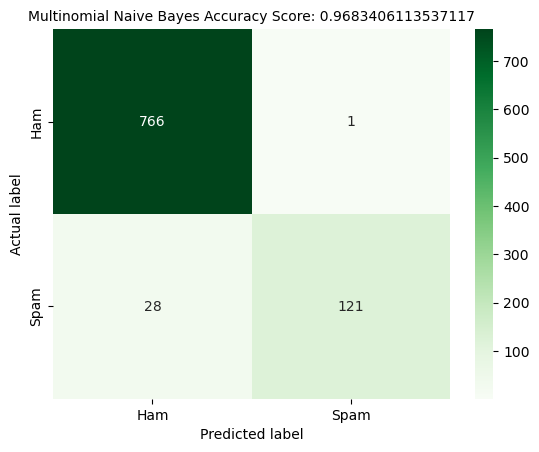

True Positive rate: 0.8120805369127517
False Negative rate: 0.18791946308724833


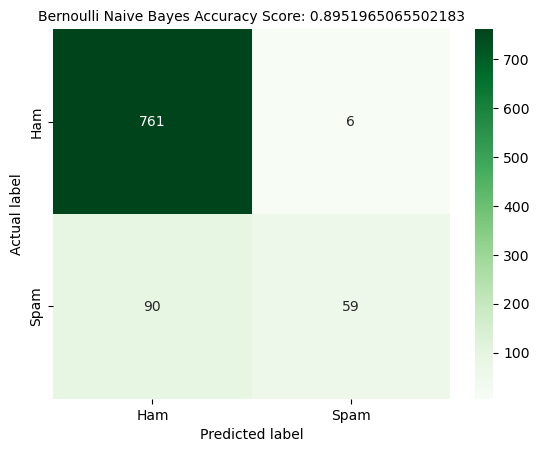

True Positive rate: 0.3959731543624161
False Negative rate: 0.6040268456375839


In [8]:
# Train and display the report fot he models
multinomial_model = train_multinomial(X_easy_train, y_easy_train)
bernoulli_model = train_bernoulli(X_easy_train, y_easy_train)

report(multinomial_model, X_easy_test, y_easy_test)
report(bernoulli_model, X_easy_test, y_easy_test)

### 2.2 Answer the following questions:
##### a) What does the CountVectorizer do?
##### Answer 2.2.a 
CountVectorizer transforms text into a matrix of word counts. Basically counting the occurance of each word in a text. In the case that we set the "binary" parameter to true. it instead only checks if a word occurs or not, assigning etiher 0 or 1 accordingly. We showcase this using an example.

In [9]:
example_text = ['this is an example text where we tell you that this is an example to showcase CountVectorizer', 
                'this is another text example to tokenize, or in our case, this would be another email']

cv1 = CountVectorizer()
cv2 = CountVectorizer(binary=True)

cv_example = cv1.fit_transform(example_text)
cv_example_binary = cv2.fit_transform(example_text)

print('The order of words in the tokens array:')
print(cv1.get_feature_names_out())

print()

print('Normal:')
print(cv_example.toarray())

print()

print('Binary:')
print(cv_example_binary.toarray())

The order of words in the tokens array:
['an' 'another' 'be' 'case' 'countvectorizer' 'email' 'example' 'in' 'is'
 'or' 'our' 'showcase' 'tell' 'text' 'that' 'this' 'to' 'tokenize' 'we'
 'where' 'would' 'you']

Normal:
[[2 0 0 0 1 0 2 0 2 0 0 1 1 1 1 2 1 0 1 1 0 1]
 [0 2 1 1 0 1 1 1 1 1 1 0 0 1 0 2 1 1 0 0 1 0]]

Binary:
[[1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1]
 [0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0]]


##### b) What is the difference between Multinomial Naive Bayes and Bernoulli Naive Bayes
##### Answer 2.2.b 
The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features. So MultinomialNB uses how MANY TIMES a word occurs to assign its probabilities while BernoulliNB uses IF a word occurs.

### 3.1 Run the two models:
Run (don't retrain) the two models from Question 2 on spam versus hard-ham. Does the performance differ compared to question 2 when the model was run on spam versus easy-ham? If so, why?

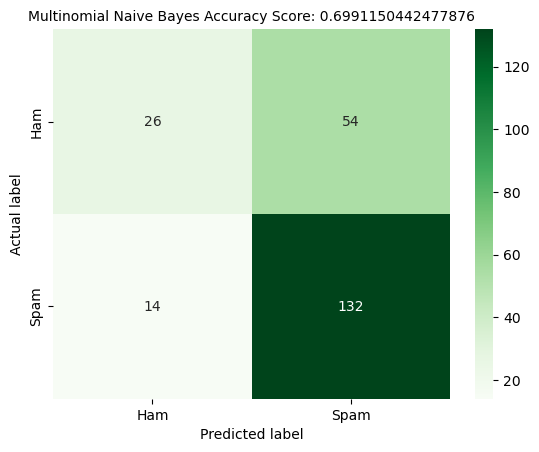

True Positive rate: 0.9041095890410958
False Negative rate: 0.0958904109589041


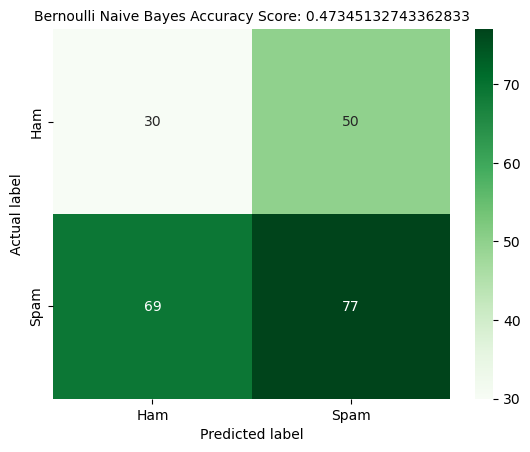

True Positive rate: 0.5273972602739726
False Negative rate: 0.4726027397260274


In [10]:
report(multinomial_model, X_hard_test, y_hard_test)
report(bernoulli_model, X_hard_test, y_hard_test)

##### Answer 3.1: 
Just as in Question 2, MultinomialNB performed much better then BernoulliNB. But both performed a lot worse compared to Question 2 overall. However, the True Positive and False Negative rates are both better. these differences can be explained by looking at a few different factros. Firstly, the size of the different datasets, easy-ham has a lot more emails than hard-ham. This explains why when training on easy_ham, the models perform much better att classifying the easy data than the hard data. But what about the True Positive and False Negative rates being better? Well this can be explained by looking at the spam/ham ratios of the data. With the easy data we have a lot more ham than spam. And with the hard data it's the other way around. These ratios will of course skew the rates in favor of True Positives since there are alot more spam data to classify than ham data.

### 3.2 Retrain
Retrain new Multinomial and Bernolli Naive Bayes classifers on the combined (easy+hard) ham and spam. Now evaluate on spam versus hard-ham as in 3.1. Also evaluate on spam versus easy-ham. Compare the performance with question 2 and 3.1. What do you observe?

In [14]:
# Load and label the emails
combined = load_files("combined", encoding='utf-8', decode_error='replace')
# Split dataset into training set and test set (70-30)
X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(combined.data, combined.target, test_size=0.3, random_state=0)

# Train and display the report fot he models
multinomial_combined_model = train_multinomial(X_combined_train, y_combined_train)
bernoulli_combined_model = train_bernoulli(X_combined_train, y_combined_train)

# Easy ham

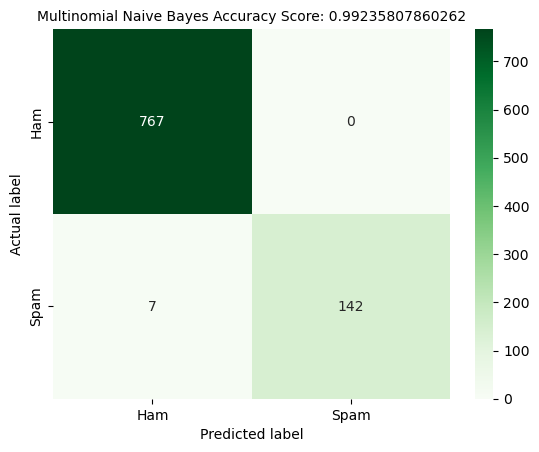

True Positive rate: 0.9530201342281879
False Negative rate: 0.04697986577181208


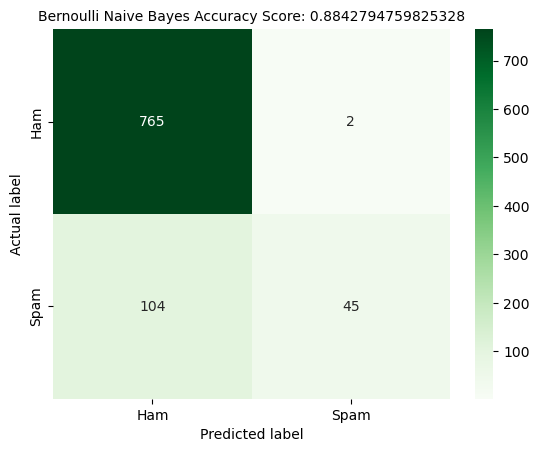

True Positive rate: 0.30201342281879195
False Negative rate: 0.697986577181208


In [15]:
report(multinomial_combined_model, X_easy_test, y_easy_test)
report(bernoulli_combined_model, X_easy_test, y_easy_test)

# Hard ham

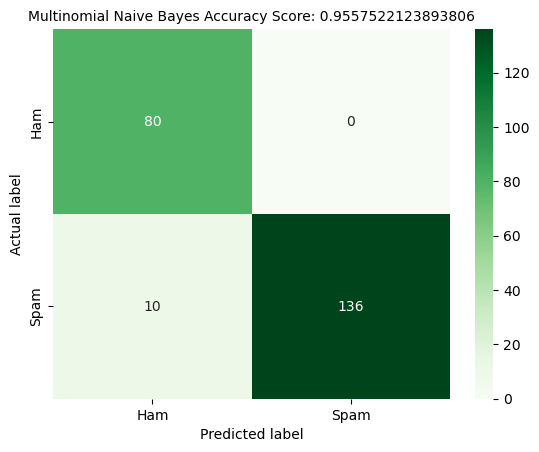

True Positive rate: 0.9315068493150684
False Negative rate: 0.0684931506849315


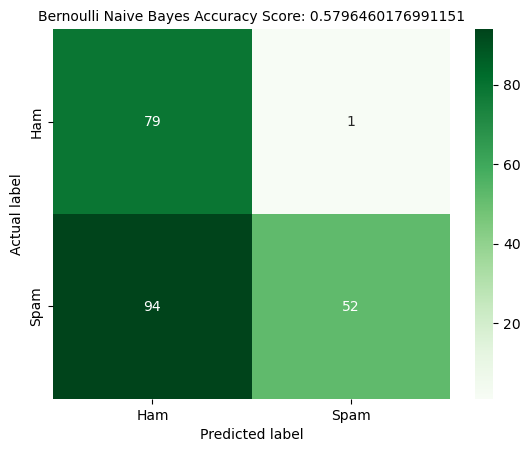

True Positive rate: 0.3561643835616438
False Negative rate: 0.6438356164383562


In [16]:
report(multinomial_combined_model, X_hard_test, y_hard_test)
report(bernoulli_combined_model, X_hard_test, y_hard_test)

##### Answer 3.2:
As expected we get much better performance with both the easy and hard ham data using the combined data, which is to be expected with more data to train on.

### 3.3 Further improvements
Do you have any suggestions for how performance could be further improved? You don't have to implement them, just present your ideas.

##### Answer 3.3: 
The first imporvement that can be made is the one hinted at in the beggining by you guys which is filtering out all the extra non relevent text in the text files. It might also be worth it to experemnt with filtering out some very common words and see if that makes the performance any better. We could probably also squeeze out a bit more performance by trying out some different parameter tuning for the models like the "alpha" parameter for example.